In [2]:
import pandas as pd
import numpy as np

In [3]:
ex1 = pd.read_excel("Book1.xlsx",index_col=0,sheet_name='ex 1',skip_blank_lines=False,na_values=0)
ex1

,Points
S .NO,
1,25.9
2,28.5
3,23.5
4,NaN
5,18.7
...,...
61,26.2
62,24.2
63,15.7


In [4]:
ex2 = pd.read_excel("Book1.xlsx", sheet_name='ex2',header=None,skip_blank_lines=False)
ex2.sample(10)

,0
24,A
42,C
51,B
56,A
45,B
2,A
22,B
1,NaN
20,C
9,B


In [37]:
ex1.isnull().sum()

Points    1
dtype: int64

In [38]:
ex2.isnull().sum()

0    8
dtype: int64

## 1st --> Normalisation of data

## 2nd--> Missing values

1. normalize the data (z-score and min max(1-10)) [ex1]
2. Missing values processing- check distribution after each preprocessing [ex1 &ex2]
	 
3. Data discretization 
	1. equal width (8 bins)
	2. equal frequency (8 bins) [ex1] 
3. smoothen by mean,median and boundary
4. convert it into categorical value for each bin 

In [68]:
#Drop the Missing Value
mean = np.mean(ex1.dropna(axis=0)) 
median = np.median(ex1.dropna(axis=0))
std = np.std(ex1.dropna(axis=0)) 
print('Mean-->', mean.values) 
print('Median-->', median) 
print('STD-->', std.values) 

Mean--> [23.6703125]
Median--> 24.3
STD--> [3.2236276]


In [66]:
#Replace with mean
ex11 = ex1.copy()
ex11.fillna(ex11.mean(),inplace=True)


mean = np.mean(ex11) 
median = np.median(ex11)
std = np.std(ex11) 

print('Mean-->', mean.values) 
print('Median-->', median) 
print('STD-->', std.values) 

Mean--> [23.6703125]
Median--> 24.3
STD--> [3.19873435]


In [67]:
#Replace with median
ex12 = ex1.copy()
ex12.fillna(ex11.median(),inplace=True)


mean = np.mean(ex12) 
median = np.median(ex12)
std = np.std(ex12) 

print('Mean-->', mean.values) 
print('Median-->', median) 
print('STD-->', std.values) 

Mean--> [23.68]
Median--> 24.3
STD--> [3.19967306]


# Min - Max Norm

In [69]:
mini = 1
maxi = 10

X_std = (ex11-ex11.min(axis=0))/(ex11.max(axis=0)-ex11.min(axis=0))
X_scaled = X_std*(maxi-mini)+mini

In [70]:
X_scaled

,Points
S .NO,
1,8.171875
2,10.000000
3,6.484375
4,6.604126
5,3.109375
...,...
61,8.382812
62,6.976562
63,1.000000


## Z-Score Norm

In [177]:
ex11_Z_SCORE = (ex11 - ex11.mean())/ex11.std()
ex11_Z_SCORE

,Points
S .NO,
1,0.691670
2,1.498215
3,-0.052833
4,0.000000
5,-1.541838
...,...
61,0.784733
62,0.164314
63,-2.472467


In [178]:
ex11_Z_SCORE.sort_values('Points',inplace=True)
ex11_Z_SCORE

,Points
S .NO,
63,-2.472467
41,-2.317362
37,-2.255320
32,-1.883069
29,-1.665922
...,...
56,1.281068
20,1.374131
10,1.405152


## 3. Data discretization 
	1. equal width (8 bins)
	2. equal frequency (8 bins) [ex1] 
3. smoothen by mean,median and boundary
4. convert it into categorical value for each bin 

In [179]:
import numpy as np 
import statistics 
import math 
from collections import OrderedDict 

# x = list(np.concatenate(ex11_Z_SCORE.values.tolist()).flat)
x = list(ex11_Z_SCORE.Points.values.tolist())  
bi = 8

In [180]:
def smooth_mean(x,bi):
    X_dict = OrderedDict() 
    # x_old will store the original data 
    x_old ={} 
    # x_new will store the data after binning 
    x_new ={} 


    for i in range(len(x)): 
        X_dict[i]= x[i] 
        x_old[i]= x[i] 

    x_dict = sorted(X_dict.items(), key = lambda x: x[1]) 

    # list of lists(bins) 
    binn =[] 
    # a variable to find the mean of each bin 
    avrg = 0

    i = 0
    k = 0
    num_of_data_in_each_bin = int(math.ceil(len(x)/bi)) 

    # performing binning 
    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            avrg = avrg + h 
            i = i + 1
        elif(i == num_of_data_in_each_bin): 
            k = k + 1
            i = 0
            binn.append(round(avrg / num_of_data_in_each_bin, 3)) 
            avrg = 0
            avrg = avrg + h 
            i = i + 1
    rem = len(x)% bi 
    if(rem == 0): 
        binn.append(round(avrg / num_of_data_in_each_bin, 3)) 
    else: 
        binn.append(round(avrg / rem, 3)) 


    #store the new value of each data 
    i = 0
    j = 0
    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            x_new[g]= binn[j] 
            i = i + 1
        else: 
            i = 0
            j = j + 1
            x_new[g]= binn[j] 
            i = i + 1
    print("number of data in each bin") 
    print(math.ceil(len(x)/bi)) 
    return x_new

In [181]:
def smooth_median(x,bi):
    X_dict = OrderedDict() 
    # x_old will store the original data 
    x_old ={} 
    # x_new will store the data after binning 
    x_new ={} 

    for i in range(len(x)): 
        X_dict[i]= x[i] 
        x_old[i]= x[i] 

    x_dict = sorted(X_dict.items(), key = lambda x: x[1]) 


    # list of lists(bins) 
    binn =[] 
    # a variable to find the mean of each bin 
    avrg =[] 

    i = 0
    k = 0
    num_of_data_in_each_bin = int(math.ceil(len(x)/bi)) 
    # performing binning 
    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            avrg.append(h) 
            i = i + 1
        elif(i == num_of_data_in_each_bin): 
            k = k + 1
            i = 0
            binn.append(statistics.median(avrg)) 
            avrg =[] 
            avrg.append(h) 
            i = i + 1

    binn.append(statistics.median(avrg)) 

    # store the new value of each data 
    i = 0
    j = 0
    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            x_new[g]= round(binn[j], 3) 
            i = i + 1
        else: 
            i = 0
            j = j + 1
            x_new[g]= round(binn[j], 3) 
            i = i + 1

    print("number of data in each bin") 
    print(math.ceil(len(x)/bi)) 
    return x_new

In [182]:
def smooth_boundary(x,bi):
    X_dict = OrderedDict() 
    # x_old will store the original data 
    x_old ={} 
    # x_new will store the data after binning 
    x_new ={} 


    for i in range(len(x)): 
        X_dict[i]= x[i] 
        x_old[i]= x[i] 

    x_dict = sorted(X_dict.items(), key = lambda x: x[1]) 

    # list of lists(bins) 
    binn =[] 
    # a variable to find the mean of each bin 
    avrg =[] 

    i = 0
    k = 0
    num_of_data_in_each_bin = int(math.ceil(len(x)/bi)) 

    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            avrg.append(h) 
            i = i + 1
        elif(i == num_of_data_in_each_bin): 
            k = k + 1
            i = 0
            binn.append([min(avrg), max(avrg)]) 
            avrg =[] 
            avrg.append(h) 
            i = i + 1
    binn.append([min(avrg), max(avrg)]) 

    i = 0
    j = 0

    for g, h in X_dict.items(): 
        if(i<num_of_data_in_each_bin): 
            if(abs(h-binn[j][0]) >= abs(h-binn[j][1])): 
                x_new[g]= binn[j][1] 
                i = i + 1
            else: 
                x_new[g]= binn[j][0] 
                i = i + 1
        else: 
            i = 0
            j = j + 1
            if(abs(h-binn[j][0]) >= abs(h-binn[j][1])): 
                x_new[g]= binn[j][1] 
            else: 
                x_new[g]= binn[j][0] 
            i = i + 1

    print("number of data in each bin") 
    print(math.ceil(len(x)/bi)) 
    return x_new

In [183]:
ex11_Z_SCORE['Smoothening_by_Mean'] = list(smooth_mean(x,bi).values())
ex11_Z_SCORE['Smoothening_by_Median'] = list(smooth_median(x,bi).values())
ex11_Z_SCORE['Smoothening_by_Boundary'] = list(smooth_boundary(x,bi).values())

number of data in each bin
9
number of data in each bin
9
number of data in each bin
9


In [184]:
ex11_Z_SCORE

,Points,Smoothening_by_Mean,Smoothening_by_Median,Smoothening_by_Boundary
S .NO,,,,
63,-2.472467,-1.818,-1.666,-2.472467
41,-2.317362,-1.818,-1.666,-2.472467
37,-2.255320,-1.818,-1.666,-2.472467
32,-1.883069,-1.818,-1.666,-1.293671
29,-1.665922,-1.818,-1.666,-1.293671
...,...,...,...,...
56,1.281068,1.147,1.095,1.405152
20,1.374131,1.147,1.095,1.405152
10,1.405152,1.147,1.095,1.405152


In [185]:
ex11_Z_SCORE.sort_index(axis = 0) 

,Points,Smoothening_by_Mean,Smoothening_by_Median,Smoothening_by_Boundary
S .NO,,,,
1,0.691670,0.774,0.785,0.691670
2,1.498215,2.996,1.498,1.498215
3,-0.052833,-0.147,-0.115,0.040230
4,0.000000,-0.147,-0.115,0.040230
5,-1.541838,-1.818,-1.666,-1.293671
...,...,...,...,...
61,0.784733,0.774,0.785,0.877796
62,0.164314,0.147,0.164,0.257377
63,-2.472467,-1.818,-1.666,-2.472467


In [6]:
# ex11_Z_SCORE['Smoothening_by_Mean'].value_counts()
# ex11_Z_SCORE['Smoothening_by_Median'].value_counts()
# ex11_Z_SCORE['Smoothening_by_Boundary'].value_counts()

In [189]:
category = pd.cut(ex11_Z_SCORE.sort_index(axis = 0).Points,8)
category = category.to_frame()
category.columns = ['range']

df_new = pd.concat([ex11_Z_SCORE.sort_index(axis = 0),category],axis = 1) 

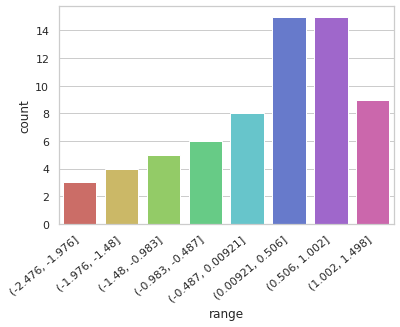

In [190]:
import matplotlib.pyplot as plt  
import seaborn as sns 
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True) 
 
#draw histogram plot 
ax = sns.countplot(x = 'range', data = df_new, palette = 'hls') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show() 

In [210]:
category = pd.qcut(ex11_Z_SCORE.sort_index(axis = 0).Points,8)
category = category.to_frame()
category.columns = ['range']

df_new = pd.concat([ex11_Z_SCORE.sort_index(axis = 0),category],axis = 1) 

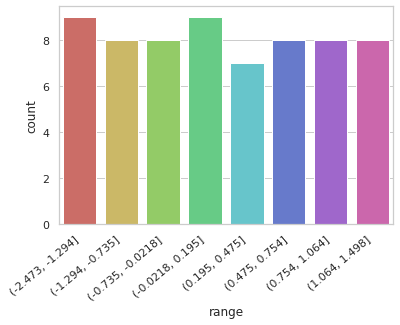

In [211]:
import matplotlib.pyplot as plt  
import seaborn as sns 
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True) 
 
#draw histogram plot 
ax = sns.countplot(x = 'range', data = df_new, palette = 'hls') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show() 

In [197]:
ex2.sample(10)

,0
39,A
54,C
26,C
42,C
32,NaN
2,A
5,B
47,B
10,C
40,NaN


In [195]:
ex2[0].value_counts()

B    26
A    11
C    11
G     1
Name: 0, dtype: int64

In [198]:
ex2.isnull().sum()

0    8
dtype: int64

In [208]:
ex2_mode = ex2.copy()
ex2_backfill = ex2.copy()
ex2_mode.mode()

,0
0,B


In [207]:
#Filling with mode
ex2_mode.fillna(ex2_mode.mode()[0],axis=0)

,0
0,B
1,B
2,A
3,A
4,B
5,B
6,B
7,B
8,B
9,B


In [209]:
#Filling with Backfill
ex2_backfill.fillna(method='bfill',axis=0)

,0
0,A
1,A
2,A
3,A
4,B
5,B
6,B
7,B
8,B
9,B
